In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [334]:
df = pd.read_csv('box_data.csv')
df.head()

,production_code,voice,chalkboard_gag,couch_gag,show_runner,written_by,directed_by
0,7G08,NaN,NaN,NaN,"James L. Brooks, Matt Groening, Sam Simon",Mimi Pond,David Silverman
1,7G02,"Marcia Wallace, Ms. Mellon","""I will not waste chalk""",Squashed Bart couch gag,"James L. Brooks, Matt Groening, Sam Simon",Jon Vitti,David Silverman
2,7G03,Marcia Wallace,"""I will not skateboard in the halls""",llapsed Couch couch gag,"James L. Brooks, Matt Groening, Sam Simon","Jay Kogen, Wallace Wolodarsky",Wes Archer
3,7G04,NaN,"""I will not burp in class""",Squashed Homer couch gag,"James L. Brooks, Matt Groening, Sam Simon","Al Jean, Mike Reiss","Gregg Vanzo, Kent Butterworth"
4,7G05,NaN,This episode did not feature a chalkboard gag,NaN,"James L. Brooks, Matt Groening, Sam Simon",John Swartzwelder,David Silverman


In [335]:
# count occurences of each value in a column
show_runner_list = df['show_runner'].str.split(',').explode('show_runner').value_counts()
couch_gag_list = df['couch_gag'].str.lower().value_counts()
guest_speaker_list =df['voice'].str.split(',').explode('voice').str.strip().value_counts()
chalkboard_gag_list = df['chalkboard_gag'].str.lower().value_counts()
written_by_list = df['written_by'].str.split(',').explode('written_by').str.strip().value_counts()
directed_by_list = df['directed_by'].str.split(',').explode('directed_by').str.strip().value_counts()

# Which guest speaker is the best one? #

In this section we are exploring the distribution over the rating of the guest speakers. Are there any guest speakers that perform significantly better than others and are episodes with guest speakers that are generally funnier than other ones?

In [336]:
df_full = df.copy()
# delete rows with nan values in the column 'voice'
df = df.dropna(subset=['voice'])
df['voice'] = df['voice'].str.split(',')
frame = df[['production_code', 'voice']].explode('voice')

In [337]:
# create a list for each guest speaker that stores the production code of each episdoe he/she was in
speaker_production_code = []
for guest in frame['voice'].unique():
    speaker_production_code.append(frame[frame['voice'] == guest]['production_code'].tolist())

# create a dictionary that stores the guest speaker as the key and the list of production codes as the value
guest_speaker_dict = {}
for i in range(len(speaker_production_code)):
    guest_speaker_dict[frame['voice'].unique()[i]] = speaker_production_code[i]

In [338]:
df_episodes = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')
df_episodes[['imdb_rating','imdb_votes']] = df_episodes[['imdb_rating','imdb_votes']].fillna(0)
df_episodes[['imdb_rating', 'imdb_votes']] = df_episodes[['imdb_rating', 'imdb_votes']].replace('', 0)


df_guest_speaker_rating = pd.DataFrame(columns=['guest_speaker', 'imdb_rating', 'imd_votes', 'number_of_episodes'])
for i in range(len(speaker_production_code)):
    
    episodes_speaker = guest_speaker_dict[frame['voice'].unique()[i]]
    guest_speaker = frame['voice'].unique()[i]
    num_episodes = len(episodes_speaker)
    episodes_rating = []
    episodes_votes = []

    for episode in episodes_speaker:
        #only take the episodes that we have the data from in the kaggle csv sheet
        if episode not in df_episodes['production_code'].unique():
            continue

        rating = df_episodes.loc[df_episodes['production_code'] == episode, 'imdb_rating'].values[0]
        votes = df_episodes.loc[df_episodes['production_code'] == episode, 'imdb_votes'].values[0]
        episodes_rating.append(rating)
        episodes_votes.append(votes)

    df_guest_speaker_rating.loc[i] = [guest_speaker, episodes_rating, episodes_votes, num_episodes]

In [339]:
df_guest_speaker_rating.to_csv('guest_speaker_rating.csv')
df_guest_speaker_rating.head()

,guest_speaker,imdb_rating,imd_votes,number_of_episodes
0,Marcia Wallace,"[7.8, 7.5, 8.2, 8.3, 8.4, 8.4, 8.2, 8.4, 8.2, ...","[1973.0, 1709.0, 1369.0, 1272.0, 1414.0, 1394....",25
1,Ms. Mellon,[7.8],[1973.0],1
2,Ron Taylor,"[7.6, 8.3]","[1674.0, 1084.0]",2
3,Albert Brooks,"[7.9, 7.5, 6.0, 9.2, 7.2, 7.3, 6.8]","[1638.0, 1578.0, 1051.0, 2439.0, 562.0, 505.0,...",7
4,Sam McMurray,[7.4],[1511.0],1
5,Kelsey Grammer,"[8.3, 8.2, 9.0, 8.3, 8.2, 7.2, 7.3, 7.1, 6.8, ...","[1716.0, 1233.0, 2010.0, 1142.0, 1100.0, 668.0...",13
6,Penny Marshall,[7.9],[1567.0],1
7,Christopher Collins,[7.9],[1567.0],1
8,June Foray,[7.9],[1567.0],1
9,Paul Willson,[7.9],[1567.0],1


<AxesSubplot:xlabel='guest_speaker'>

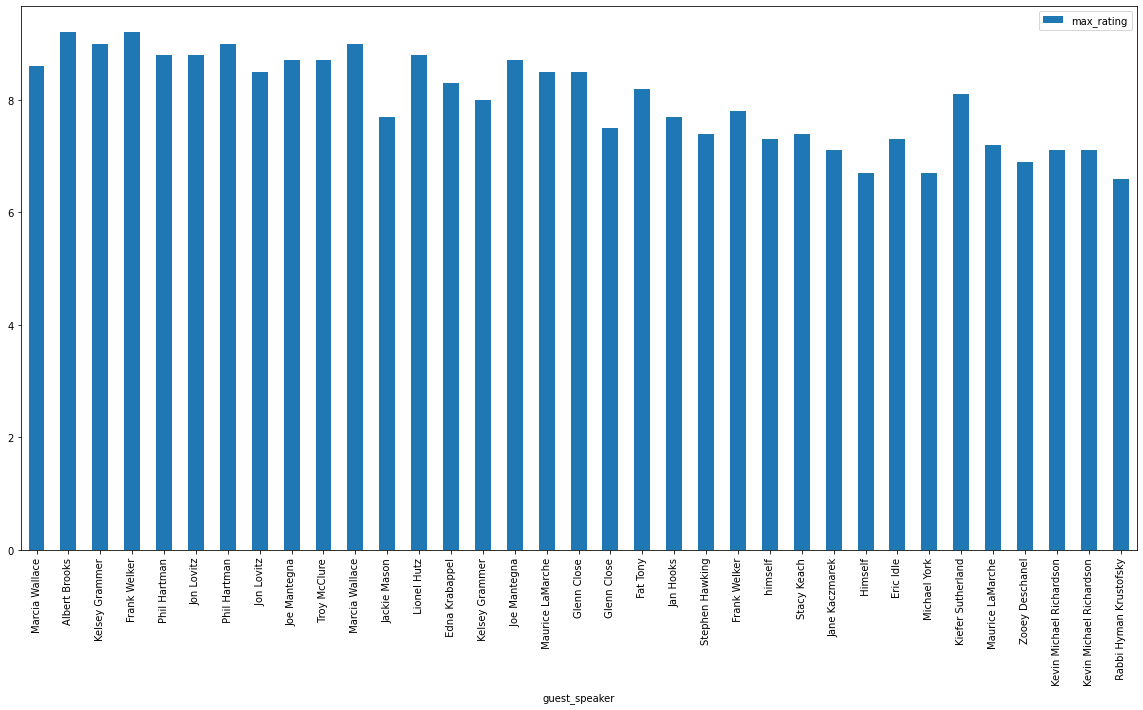

In [353]:
df_guest_speaker_rating.head()
# remove empty arrays from the imdb_rating column
df_guest_speaker_rating = df_guest_speaker_rating[df_guest_speaker_rating['imdb_rating'].map(len) > 0]
#print(df_guest_speaker_rating['imdb_rating'].any())
df_guest_speaker_rating['max_rating'] = df_guest_speaker_rating['imdb_rating'].apply(lambda x: np.max(x))

#create a column with the average rating of the guest speaker
# plot the average rating of the guest speaker when they at least appeared in 3 episodes
df_guest_speaker_rating[df_guest_speaker_rating['number_of_episodes'] >= 3].plot(x='guest_speaker', y='max_rating', kind='bar', figsize=(20,10))  

It becomes clear that the rating of the guest speakers is uniformly distributed. There doesnt seem to be a guest speaker that stands out from the rest.

# Do episodes with guest speakers get better reviews than the ones without? #

In [357]:
# get a list of all the episodes that have a guest speaker and one without guest speakers
df_guest_speaker = df_full.dropna(subset=['voice'])
df_no_guest_speaker = df_full[df_full['voice'].isna()]

df_episodes = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')
# get the average rating of the episodes with guest speakers
print('Average with guest speakers',df_episodes[df_episodes['production_code'].isin(df_guest_speaker['production_code'])]['imdb_rating'].mean())
# get the average rating of the episodes without guest speakers
print('Average without a guest speaker',df_episodes[df_episodes['production_code'].isin(df_no_guest_speaker['production_code'])]['imdb_rating'].mean())

Average with guest speakers 7.393873085339169
Average without a guest speaker 7.385074626865671


It also becomes clear that episodes with guest speakers dont get a better rating than episodes without one.

# Development of speaking time for the simpsons family over the course of time #
In the following script we are trying to find out how the speaking time of each character changes over the course of the seasons. Since the speaking time is roughly linearly dependant on the word count, we counted the words for each character in each episode and added it up over the seasons.

In [295]:
df_scripts = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')
df_scripts.head()
#return the index with the maximum value in the column 'word_count'
df_scripts['word_count'].idxmax()
# remove outliers from word count
df_scripts = df_scripts[df_scripts['word_count'] < 150]
# plot the dstribution of the word count
#df_scripts['word_count'].plot.hist(bins=100)

C:\Users\Jan\AppData\Local\Temp/ipykernel_8616/2168568990.py:1: DtypeWarning: Columns (4,5,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scripts = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')


In [296]:
df_scripts = df_scripts.dropna(subset=['character_id','word_count'])
df_scripts['character_id'] = df_scripts['character_id'].astype(int)
df_scripts['word_count'] = df_scripts['word_count'].astype(int)
df_scripts = df_scripts[['character_id', 'word_count','episode_id']]	

132087

In [297]:
# create a list for each episode that stores the character id and the word count of each character in the episode
episode_id = []
for episode in df_scripts['episode_id'].unique():
    episode_id.append(df_scripts[df_scripts['episode_id'] == episode][['character_id','word_count']].values)

# create a dictionary that stores the episode id as the key and a list of tuples that represent the character id and the word count as the value
episode_dict = {}
for i in range(len(episode_id)):
    episode_dict[df_scripts['episode_id'].unique()[i]] = episode_id[i]

In [298]:
df_characters = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
df_characters.head()

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [299]:
for i,episode in enumerate(df_scripts['episode_id'].unique()):
    character_dict = {}
    list = episode_id[i].tolist()
    for line in list:
        #sum the word count of each character in the episode
        if line[0] not in character_dict:
            character_dict[line[0]] = line[1]
        else:
            character_dict[line[0]] += line[1]
    episode_dict[episode] = character_dict

In [301]:
df_characters = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
df_characters.head()
def map_character_id_to_name(id):
    return df_characters.loc[df_characters['id'] == id, 'normalized_name'].values[0]
for characters in episode_dict.keys():
    episode_dict[characters] = {map_character_id_to_name(key): value for key, value in episode_dict[characters].items()}

In [302]:
season_dict = {}
df_episodes = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')
# group the episodes by season
for season in df_episodes['season'].unique():
    season_dict[season] = df_episodes.loc[df_episodes['season'] == season, 'id'].values.tolist()
# create a dictionary that stores the season as the key and a list of tuples that represent the character id and the word count as the value per season
season_character_dict = {}
for season in season_dict.keys():
    season_character_dict[season] = {}
    for episode in season_dict[season]:
        # if statement to check if the episode is in the episode_dict
        if episode not in episode_dict.keys():
            continue
        for character in episode_dict[episode].keys():
            if character not in season_character_dict[season]:
                season_character_dict[season][character] = episode_dict[episode][character]
            else:
                season_character_dict[season][character] += episode_dict[episode][character]


{'eugene fisk': 4,
 'mr fisk': 92,
 'marge simpson': 3662,
 'homer simpson': 8146,
 'bart simpson': 4868,
 'lisa simpson': 1871,
 'female mail carrier': 28,
 'carl carlson': 30,
 'waiter': 39,
 'workers': 39,
 'lenny leonard': 41,
 'princess kashmir': 50,
 'hoyt': 4,
 'martin prince': 163,
 'girl 1': 12,
 'boy 1': 10,
 'all kids': 1,
 'milhouse van houten': 105,
 'freddie': 12,
 'lewis clark': 63,
 'lewiss dad': 22,
 'al': 23,
 'secretary': 33,
 'rev timothy lovejoy': 171,
 'waylon smithers': 231,
 'c montgomery burns': 646,
 'clerk': 79,
 'happy man': 4,
 'little boy': 42,
 'funky guy': 3,
 'moe szyslak': 444,
 'barney gumble': 259,
 'manager': 13,
 'man at door': 11,
 'ticket-seller': 22,
 'stage manager': 14,
 'gulliver dark': 139,
 'theatre-goer 1': 10,
 'theatre-goer 2': 12,
 'theatre-goer 3': 5,
 'krusty the clown': 374,
 'children': 41,
 'brittany': 2,
 'itchy scratchy chorus': 21,
 'patty bouvier': 237,
 'selma bouvier': 82,
 'apu nahasapeemapetilon': 101,
 'police artist': 12,

In [312]:
df_season_character = pd.DataFrame(columns=['season', 'character', 'word_count'])
for season in season_character_dict.keys():
    for character in season_character_dict[season].keys():
        df_season_character.loc[len(df_season_character.index)] = [season, character, season_character_dict[season][character]]
df_season_character.head()

,season,character,word_count
0,1,eugene fisk,4
1,1,mr fisk,92
2,1,marge simpson,3662
3,1,homer simpson,8146
4,1,bart simpson,4868
5,1,lisa simpson,1871
6,1,female mail carrier,28
7,1,carl carlson,30
8,1,waiter,39
9,1,workers,39


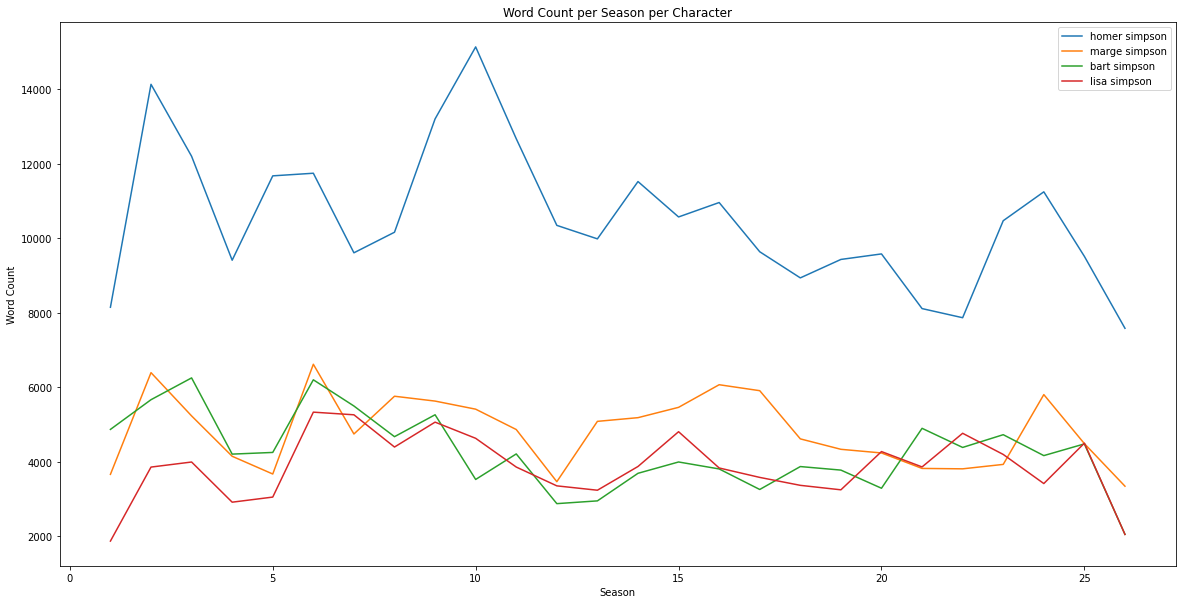

In [320]:
df_season_character_copy = df_season_character.copy()
df_season_character = df_season_character_copy.copy()
''' group by characters and sum the word count per season in descending order and only include a list of characters per season '''
df_season_character = df_season_character.loc[df_season_character['character'].isin(['bart simpson', 'homer simpson', 'lisa simpson', 'maggie simpson', 'marge simpson'])]
df_season_character = df_season_character.groupby(['season','character']).sum().sort_values(by=['season','word_count'], ascending=False).groupby('season').head(11).reset_index()
df_season_character.head(20)
characters = ['bart simpson', 'homer simpson', 'lisa simpson', 'maggie simpson', 'marge simpson']

# now plot how there word count changes over the seasons

fig, ax = plt.subplots(figsize=(20,10))
for character in df_season_character['character'].unique():
    df = df_season_character[df_season_character['character'] == character]
    ax.plot(df['season'], df['word_count'], label=character)
ax.set_xlabel('Season')
ax.set_ylabel('Word Count')
ax.set_title('Word Count per Season per Character')
ax.legend()
plt.show()


It is obvious that the word count does underly some changes but the ranking roughly stays the same. Homer always says the most and Marge, Bart and Lisa have roughly the same speaking time. 